<a href="https://colab.research.google.com/github/Mahesh-Alyana/oneAPI-Intel/blob/kaushik/oneAPI%20for%20reserch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Load dataset
df = pd.read_csv("/content/training_data_sentiment.csv")

# Remove unnecessary columns
df = df.drop(['Source', 'PublishDate'], axis=1)

# Remove missing values
df = df.dropna()

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens to form text again
    text = " ".join(tokens)
    
    return text

# Preprocess text in the dataset
df['clean_title'] = df['Title'].apply(preprocess_text)


In [17]:
df['Topic'].unique()

array(['obama', 'economy', 'microsoft', 'palestine'], dtype=object)

In [35]:
df.shape

(13488, 11)

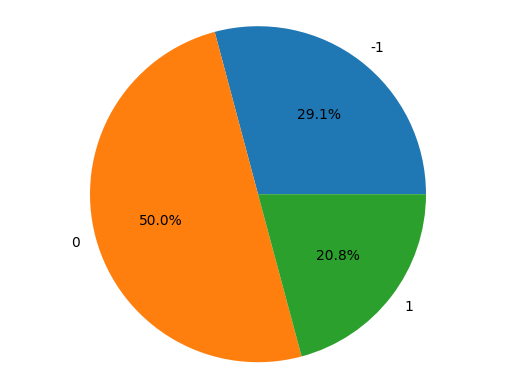

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
fb_column = pd.Series([-1, 0, 1])

# Count the number of occurrences of each value
value_counts = df['Facebook'].value_counts()

# Calculate the percentage of each value
total = len(fb_column)
percent_neg_one = value_counts[-1] / total * 100
percent_zero = value_counts[0] / total * 100
percent_one = value_counts[1] / total * 100

# Create a pie chart
labels = ['-1', '0', '1']
sizes = [percent_neg_one, percent_zero, percent_one]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
plt.savefig('fb.png')

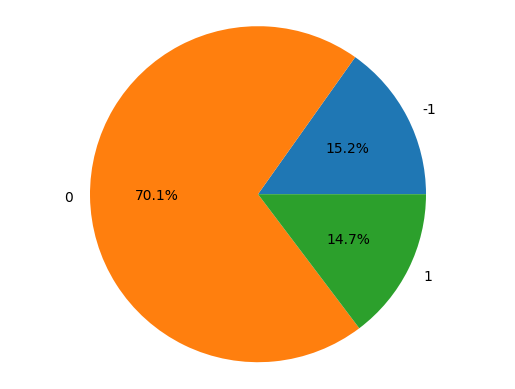

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
fb_column = pd.Series([-1, 0, 1])

# Count the number of occurrences of each value
value_counts = df['GooglePlus'].value_counts()

# Calculate the percentage of each value
total = len(fb_column)
percent_neg_one = value_counts[-1] / total * 100
percent_zero = value_counts[0] / total * 100
percent_one = value_counts[1] / total * 100

# Create a pie chart
labels = ['-1', '0', '1']
sizes = [percent_neg_one, percent_zero, percent_one]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
plt.savefig('gp.png')

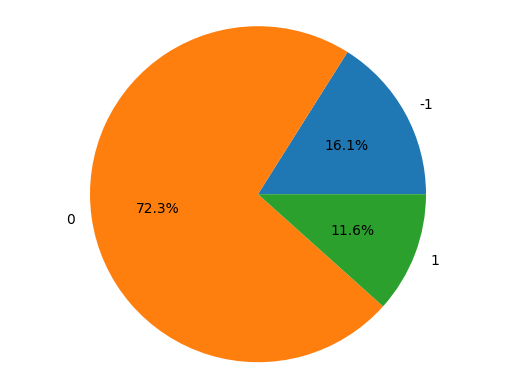

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
fb_column = pd.Series([-1, 0, 1])

# Count the number of occurrences of each value
value_counts = df['LinkedIn'].value_counts()

# Calculate the percentage of each value
total = len(fb_column)
percent_neg_one = value_counts[-1] / total * 100
percent_zero = value_counts[0] / total * 100
percent_one = value_counts[1] / total * 100

# Create a pie chart
labels = ['-1', '0', '1']
sizes = [percent_neg_one, percent_zero, percent_one]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
plt.savefig('ln.png')

In [21]:
df['clean_headline'] = df['Headline'].apply(preprocess_text)

In [22]:
import gensim

# Convert preprocessed text to gensim dictionary and corpus
texts = [doc.split() for doc in df['clean_title']]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define number of topics and run LDA model
num_topics = 4
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print top words in each topic
for topic in lda_model.show_topics(num_topics=num_topics):
    print(topic)


(0, '0.045*"microsoft" + 0.020*"obama" + 0.012*"palestine" + 0.009*"shooting" + 0.008*"office" + 0.008*"palestinian" + 0.008*"cloud" + 0.007*"new" + 0.007*"san" + 0.006*"law"')
(1, '0.113*"economy" + 0.014*"u" + 0.011*"economic" + 0.010*"climate" + 0.010*"china" + 0.009*"growth" + 0.007*"say" + 0.007*"global" + 0.007*"attack" + 0.005*"2016"')
(2, '0.078*"microsoft" + 0.017*"window" + 0.013*"microsofts" + 0.013*"obama" + 0.013*"10" + 0.009*"new" + 0.009*"one" + 0.008*"gun" + 0.008*"xbox" + 0.007*"update"')
(3, '0.091*"obama" + 0.027*"obamas" + 0.016*"president" + 0.012*"isi" + 0.010*"state" + 0.010*"say" + 0.009*"surface" + 0.009*"palestine" + 0.009*"terrorism" + 0.008*"u"')


In [23]:
import gensim

# Convert preprocessed text to gensim dictionary and corpus
texts = [doc.split() for doc in df['clean_headline']]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define number of topics and run LDA model
num_topics = 5
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print top words in each topic
for topic in lda_model.show_topics(num_topics=num_topics):
    print(topic)

(0, '0.062*"economy" + 0.020*"economic" + 0.014*"year" + 0.011*"growth" + 0.009*"said" + 0.008*"u" + 0.008*"quarter" + 0.008*"percent" + 0.006*"rate" + 0.006*"month"')
(1, '0.059*"obama" + 0.053*"president" + 0.028*"barack" + 0.012*"u" + 0.011*"said" + 0.010*"state" + 0.010*"obamas" + 0.009*"paris" + 0.008*"washington" + 0.006*"sunday"')
(2, '0.010*"one" + 0.010*"shooting" + 0.009*"surface" + 0.008*"xbox" + 0.007*"first" + 0.007*"lumia" + 0.006*"oval" + 0.006*"new" + 0.006*"refugee" + 0.005*"time"')
(3, '0.053*"microsoft" + 0.015*"new" + 0.013*"window" + 0.011*"company" + 0.009*"10" + 0.008*"microsofts" + 0.006*"announced" + 0.005*"today" + 0.005*"’" + 0.005*"service"')
(4, '0.024*"palestinian" + 0.016*"palestine" + 0.012*"2015" + 0.009*"israeli" + 0.008*"israel" + 0.006*"isi" + 0.006*"dec" + 0.006*"december" + 0.006*"international" + 0.005*"mass"')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_title'], df['SentimentTitle'], test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)




In [25]:
print(y_train.value_counts())


 0.000000    2143
 0.041667     138
 0.044194     113
-0.088388     103
 0.039528      99
             ... 
-0.396981       1
 0.101278       1
 0.049870       1
-0.099158       1
-0.173529       1
Name: SentimentTitle, Length: 3004, dtype: int64


In [26]:
import pandas as pd

# Convert continuous values to discrete labels
y_train = pd.cut(y_train, bins=[-float("inf"),-0.0001,0.0001, float("inf")], labels=[0, 1, 2])
y_test = pd.cut(y_test, bins=[-float("inf"), -0.0001,0.0001, float("inf")], labels=[0, 1, 2])

In [27]:
print(y_train.value_counts())


0    4525
2    4120
1    2145
Name: SentimentTitle, dtype: int64


In [29]:
# Train SVM classifier
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

# Predict on test data
y_pred = svm.predict(X_test_vec)
y_pred = pd.cut(y_pred, bins=[-float("inf"),-0.0001,0.0001, float("inf")], labels=[0, 1,2])

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1120
           1       0.12      0.26      0.16       521
           2       0.57      0.84      0.68      1057

    accuracy                           0.38      2698
   macro avg       0.23      0.37      0.28      2698
weighted avg       0.25      0.38      0.30      2698



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_pred.value_counts()

0       0
1    1145
2    1553
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_headline'], df['SentimentHeadline'], test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [32]:
import pandas as pd

# Convert continuous values to discrete labels
y_train = pd.cut(y_train, bins=[-float("inf"),-0.0001,0.0001, float("inf")], labels=[0, 1,2])
y_test = pd.cut(y_test, bins=[-float("inf"), -0.0001,0.0001, float("inf")], labels=[0, 1,2])

In [36]:
# Train SVM classifier
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

# Predict on test data
y_pred = svm.predict(X_test_vec)
y_pred = pd.cut(y_pred, bins=[-float("inf"), -0.0001,0.0001 , float("inf")], labels=[0, 1,2])



In [37]:
y_pred.value_counts()

0       0
1    1657
2    1041
dtype: int64